##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

### Prepare The Required Libraries And The Image

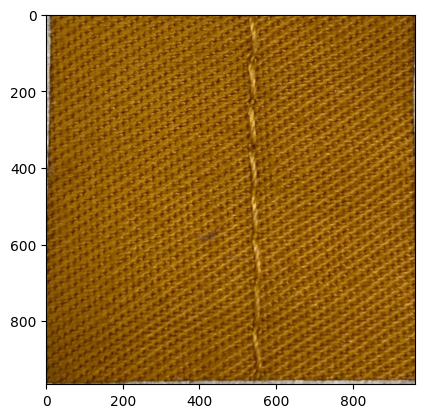

In [276]:
import cv2 												# OpenCV (Requirement For Image Processing)
import numpy as np									# Numpy (Requirement For Special Math Operations Like Matrix Multiplication)
import matplotlib.pyplot as plt					# Matplotlib (Requirement For Plotting Graphs Or Evaluate The Result)

path = 'dataset/train/straight/straight31.jpg' 		# Path to the image

image = cv2.imread(path)							# Load the image based on the path

if image is None:
    print("Failed to load image")   
else:
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)			# Convert the image to RGB (OpenCV uses BGR)

	plt.imshow(image)									# Display the image

### Change The Image Color Into GrayScale To Detect Different Color Stitch Fabric Easier By The Program

The resolution of the image is 964x965 pixels.


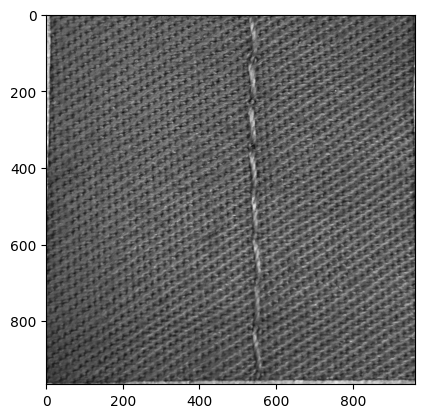

In [277]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)          # Load image in grayscale

if image is None:
    print("Failed to load image")   
else:
    height, width = image.shape[:2] # Get the image resolution (height, width) In Pixels
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')  # Display the image in grayscale cmap is use because matplotlib uses RGB and OpenCV uses BGR

### Resize The Image To Make Sure The Program Can Handle Better From The Image

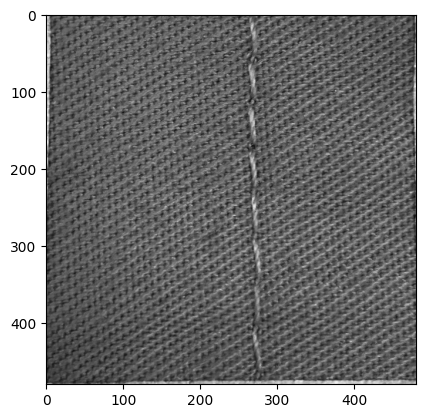

In [278]:
# Resize the image into 320x320 pixels
image = cv2.resize(image, (480, 480))

# Display the resized image
plt.imshow(image, cmap='gray')

### Blur The Image To Make Sure Detection Dont Detect The Noise In The Image <br>(In This Case Its Fabric)

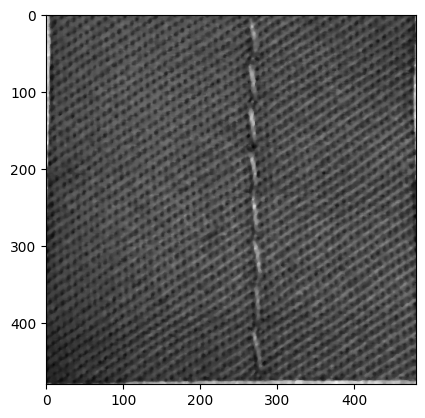

In [279]:
# Apply Median Blur to the image
image = cv2.medianBlur(image, 5)

# Display the image after applying Median Blur
plt.imshow(image, cmap='gray')

In [280]:
# image = cv2.GaussianBlur(image, (5, 5), sigmaX = 1) # Apply Gaussian Blur to the image with a kernel size of 5x5

# # Display the image after applying Gaussian Blur
# plt.imshow(image, cmap='gray')

In [281]:
# # Threshold the image
# _, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

# # Display the image after applying threshold
# plt.imshow(image, cmap='gray')

In [ ]:
import numpy as np
import math

#Hough Line Transform
dst = cv2.Canny(image, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
plt.imshow(cdst)

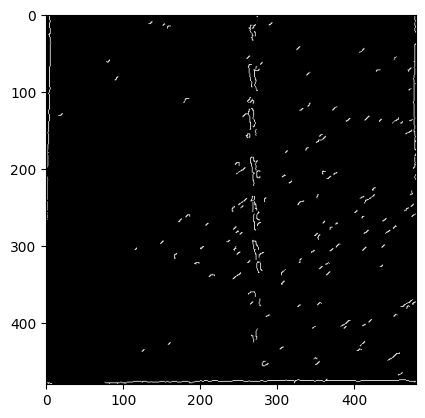

In [282]:
# Detect edges with Canny Opencv
image = cv2.Canny(image, 120, 200)	# Canny(image, threshold1, threshold2) Operasi Untuk Menangkap Garis Tepi Pada Gambar

plt.imshow(image, cmap='gray')

Number of lines: 8


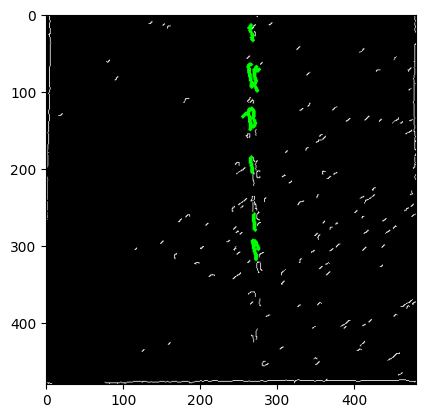

In [283]:
# Count White Lines Of The Images
contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # Find the contours
# findContours(image, mode, method) mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE

# Filter out small contours and count the remaining ones
lines = [c for c in contours if cv2.boundingRect(c)[2] < cv2.boundingRect(c)[3] and cv2.boundingRect(c)[3] > 20 and cv2.boundingRect(c)[3] < 40 and cv2.boundingRect(c)[2] < 20] # Filter out small contours (noise)
# Where boundingRect(c) return in the format (x, y, w, h) where can be called with 0 = x(arah gambar), 1 = y(arah gambar), 2 = width, 3 = height
number_of_lines = len(lines) # Count the remaining contours

image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 		# Convert the image to RGB (OpenCV uses BGR)

cv2.drawContours(image, lines, -1, (0, 255, 0), 3) 	# Draw the contours

plt.imshow(image) 
print(f'Number of lines: {number_of_lines}')